In [8]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
cd ~/Epfl/MachineLearning/ML_course/labs

/home/mbanga/Epfl/MachineLearning/ML_course/labs


# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [10]:
import ex02.template.costs as cts
import ex02.template.grid_search as grid_search
import ex02.template.plots as plots
import datetime
from ex03.template.helpers import *

In [11]:
def least_squares(y, tx):
    """calculate the least squares solution."""
    # least squares
    # returns mse, and optimal weights
    
    # calculate the SVD decomposition
    U, s, V = np.linalg.svd(tx, full_matrices=True, compute_uv=True)
    N = len(U)
    D = len(V)
    lambdas = len(s)
    
    # Construct S (U*S*V = tx) and its pseudo-inverse Sinv
    S = np.zeros((N, D))
    S[:lambdas, :lambdas] = np.diag(s)
    Sinv = np.zeros((D, N))
    Sinv[:lambdas, :lambdas] = np.diag(1/s)
    
    # calculate the best approximation
    w = np.dot(np.dot(np.dot(V.T, Sinv), U.T), y)
    
    # calculate the mse for the best approximation
    loss = cts.compute_mse(y, tx, w)
    
    return w, loss

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [12]:
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    # ***************************************************
    # Grid Search
    # ***************************************************
    
    # Generate the grid of parameters to be swept
    grid_w0, grid_w1 = grid_search.generate_w(num_intervals=10)
    
    # Start the grid search
    grid_start_time = datetime.datetime.now()
    grid_losses = grid_search.grid_search(y, tx, grid_w0, grid_w1)

    # Select the best combinaison
    grid_loss_star, grid_w0_star, grid_w1_star = grid_search.get_best_parameters(grid_w0, grid_w1, grid_losses)
    grid_end_time = datetime.datetime.now()
    grid_execution_time = (grid_end_time - grid_start_time).total_seconds()
    
    # Print the results
    print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
          l=grid_loss_star, w0=grid_w0_star, w1=grid_w1_star, t=grid_execution_time), "\n\n")
    
    # ***************************************************
    # Least Squares
    # ***************************************************
    
    # Start the least squares
    ls_start_time = datetime.datetime.now()
    ls_w_star, ls_loss_star = least_squares(y, tx)
    
    # Determine execution time
    ls_end_time = datetime.datetime.now()
    ls_execution_time = (ls_end_time - ls_start_time).total_seconds()
    
    # Print the results
    print("Least Squares: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
          l=ls_loss_star, w0=ls_w_star[0], w1=ls_w_star[1], t=ls_execution_time), "\n\n")
   
    # ***************************************************
    # Ridge Regression
    # ***************************************************
    
    # Start the least squares
    ridge_start_time = datetime.datetime.now()
    ridge_w_star, ridge_loss_star = ridge_regression(y, tx, 0)
    
    # Determine execution time
    ridge_end_time = datetime.datetime.now()
    ridge_execution_time = (ridge_end_time - ridge_start_time).total_seconds()
    
    # Print the results
    print("Ridge Regression: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
          l=ridge_loss_star, w0=ridge_w_star[0], w1=ridge_w_star[1], t=ridge_execution_time))
    

Test it here

In [13]:
test_your_least_squares()

Grid Search: loss*=42.42448314678253, w0*=66.66666666666669, w1*=16.666666666666686, execution time=0.085 seconds 


Least Squares: loss*=15.385887868829455, w0*=73.2939220021052, w1*=13.479712434989068, execution time=0.424 seconds 


Ridge Regression: loss*=15.385887868829453, w0*=73.29392200210516, w1*=13.479712434989063, execution time=0.002 seconds


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [14]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [15]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    # this function should return the matrix formed
    # by applying the polynomial basis to the input data

    tx = np.ones((len(x), 1))
    x = x.reshape(len(x), 1)
    for i in range(1, degree + 1):
        tx = np.concatenate((tx, x ** i), axis=1)
    return tx

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [16]:
from ex02.template.costs import *
from ex03.template.plots import *

In [17]:
def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        # form the data to do polynomial regression
        tx = build_poly(x, degree)

        # least square and calculate RMSE
        weights, l = least_squares(y, tx)
        rmse = compute_rmse(y, tx, weights)

        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, weights, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    plt.savefig("visualize_polynomial_regression")
    plt.show()

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421885
Processing 2th experiment, degree=3, rmse=0.2585827766773749
Processing 3th experiment, degree=7, rmse=0.2496587036090748
Processing 4th experiment, degree=12, rmse=0.24032507466222977


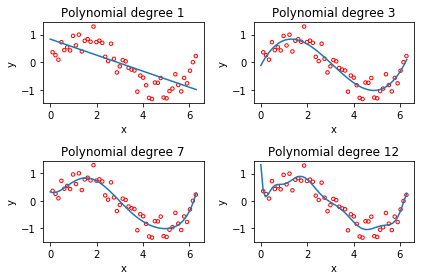

In [18]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [19]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)

    # shuffle the data
    data_size = len(y)    
    shuffle_indices = np.random.permutation(np.arange(data_size))
    x = x[shuffle_indices]
    y = y[shuffle_indices]
    
    # split the shuffled data based on the given ratio
    cut = int(len(x) * ratio)
    
    y_training = y[:cut]; x_training = x[:cut]
    y_testing = y[cut:];  x_testing = x[cut:]
    
    
    return [x_training, y_training], [x_testing, y_testing]

Then, test your `split_data` function below.

In [20]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    # split the data, and return train and test data
    training_data, testing_data = split_data(x, y, ratio, seed)
    
    # form train and test data with polynomial basis function
    y_tr = training_data[1]
    tx_tr = build_poly(training_data[0], degree)
    
    y_te = testing_data[1]
    tx_te = build_poly(testing_data[0], degree)
    
    # calcualte weight through least square.
    weights = least_squares(y_tr, tx_tr)[0]

    # calculate RMSE for train and test data
    rmse_tr = compute_rmse(y_tr, tx_tr, weights)
    rmse_te = compute_rmse(y_te, tx_te, weights)
    
    # print the results
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [21]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=0.242, Testing RMSE=0.250
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=0.205, Testing RMSE=1.065
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=2.202
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=10.218


# 3 Ridge Regression
Please fill in the function below.

In [22]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    # ridge regression
    # return the optimal solution and its associated cost
    
    # We know that the solution for ridge regression equation
    # is given by w* = (tx.T*tx + 2N*lambda*I)^(-1) * tx.T * y
    
    # calculate the SVD decomposition of temp = (tx.T*tx + 2N*lambda*I)
    temp = np.dot(tx.T, tx) + 2*len(tx)*lambda_*np.identity(len(tx[0]))
    
    # calculate the inverse of temp
    U, s, V = np.linalg.svd(temp, full_matrices=True, compute_uv=True)
    lambdas = len(s)
    N = len(temp)
    D = len(temp[0])
        
    Sinv = np.zeros((D, N))
    Sinv[:lambdas, :lambdas] = np.diag(1/s)
    temp_inv = np.dot(np.dot(V.T, Sinv), U.T)
    
    # calculate the optimal weights
    ws = np.dot(np.dot(temp_inv, tx.T), y)
    
    # calculate the cost for the optimal solution
    loss = cts.compute_mse(y, tx, ws) + (lambda_ * sum(ws ** 2)) / 2
    
    return ws, loss

In [23]:
def ridge_mse(y, tx, ws, lambda_):
    """Calculate the loss using Ridge Mean Square Error.
   
    """
    return compute_mse(y, tx, ws) + (lambda_ * sum(ws ** 2)) / 2

In [24]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    
    # split the data, and return train and test data
    training_data, testing_data = split_data(x, y, ratio, seed)

    # form train and test data with polynomial basis function
    y_tr = training_data[1]
    tx_tr = build_poly(training_data[0], degree)
    
    y_te = testing_data[1]
    tx_te = build_poly(testing_data[0], degree)    

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        # ridge regression with a given lambda
        ws, _ = ridge_regression(y_tr, tx_tr, lambda_)
        
        rmse_tr.append(ridge_mse(y_tr, tx_tr, ws, lambda_))
        rmse_te.append(ridge_mse(y_te, tx_te, ws, lambda_))
        
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.026, Testing RMSE=0.057
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.026, Testing RMSE=0.057
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.026, Testing RMSE=0.057
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.026, Testing RMSE=0.056
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.026, Testing RMSE=0.056
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.026, Testing RMSE=0.056
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.027, Testing RMSE=0.055
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.027, Testing RMSE=0.052
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.028, Testing RMSE=0.047
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.030, Testing RMSE=0.042
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.034, Testing RMSE=0.041
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.039, Testing RMSE=0.049
proportion=0.5, degree=7, lambda=0.193, 

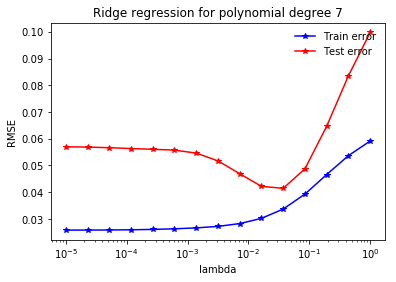

In [25]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)